## PHL Dataset

1. Some fields include derived or modeled data, which might include large errors for different reasons. 

2. Lower limit measurements of radius and mass are indicated with the flags p_radius_limit = ±1 and p_mass_limit = ±1, respectively.

3. Some calculated fields in the catalogs are listed with machine precision, and the number of digits does not correspond to the observational precision.

4. As of January 2024, the data files are being actively updated with new fields or corrections.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [2]:
df_phl = pd.read_csv('../data/raw/hwc_all_exoplanets_with_ESI.csv')
df_phl.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


In [3]:
df_phl.shape

(5599, 118)

The full catalog has data for all confirmed exoplanets analyzed by the HWC. Those potentially habitable are identified with the flag p_habitable > 0 (conservative = 1 and optimistic = 2).

In [4]:
df_phl['P_HABITABLE'].unique()

array([0, 2, 1])

In [5]:
df_phl['P_HABITABLE'].value_counts()

P_HABITABLE
0    5529
2      41
1      29
Name: count, dtype: int64

In [6]:
class_imbalance = df_phl['P_HABITABLE'].value_counts()[0]/(df_phl['P_HABITABLE'].value_counts()[1]+df_phl['P_HABITABLE'].value_counts()[2])
print(f'Imbalance Ratio (Class 0 to Class non-zero): {class_imbalance:.2f}')

Imbalance Ratio (Class 0 to Class non-zero): 78.99


The class imbalance is significant in this dataset. With class 0 comprising about 79% of the dataset.

In [7]:
missing_values = df_phl.isnull().sum().sort_values(ascending=False)

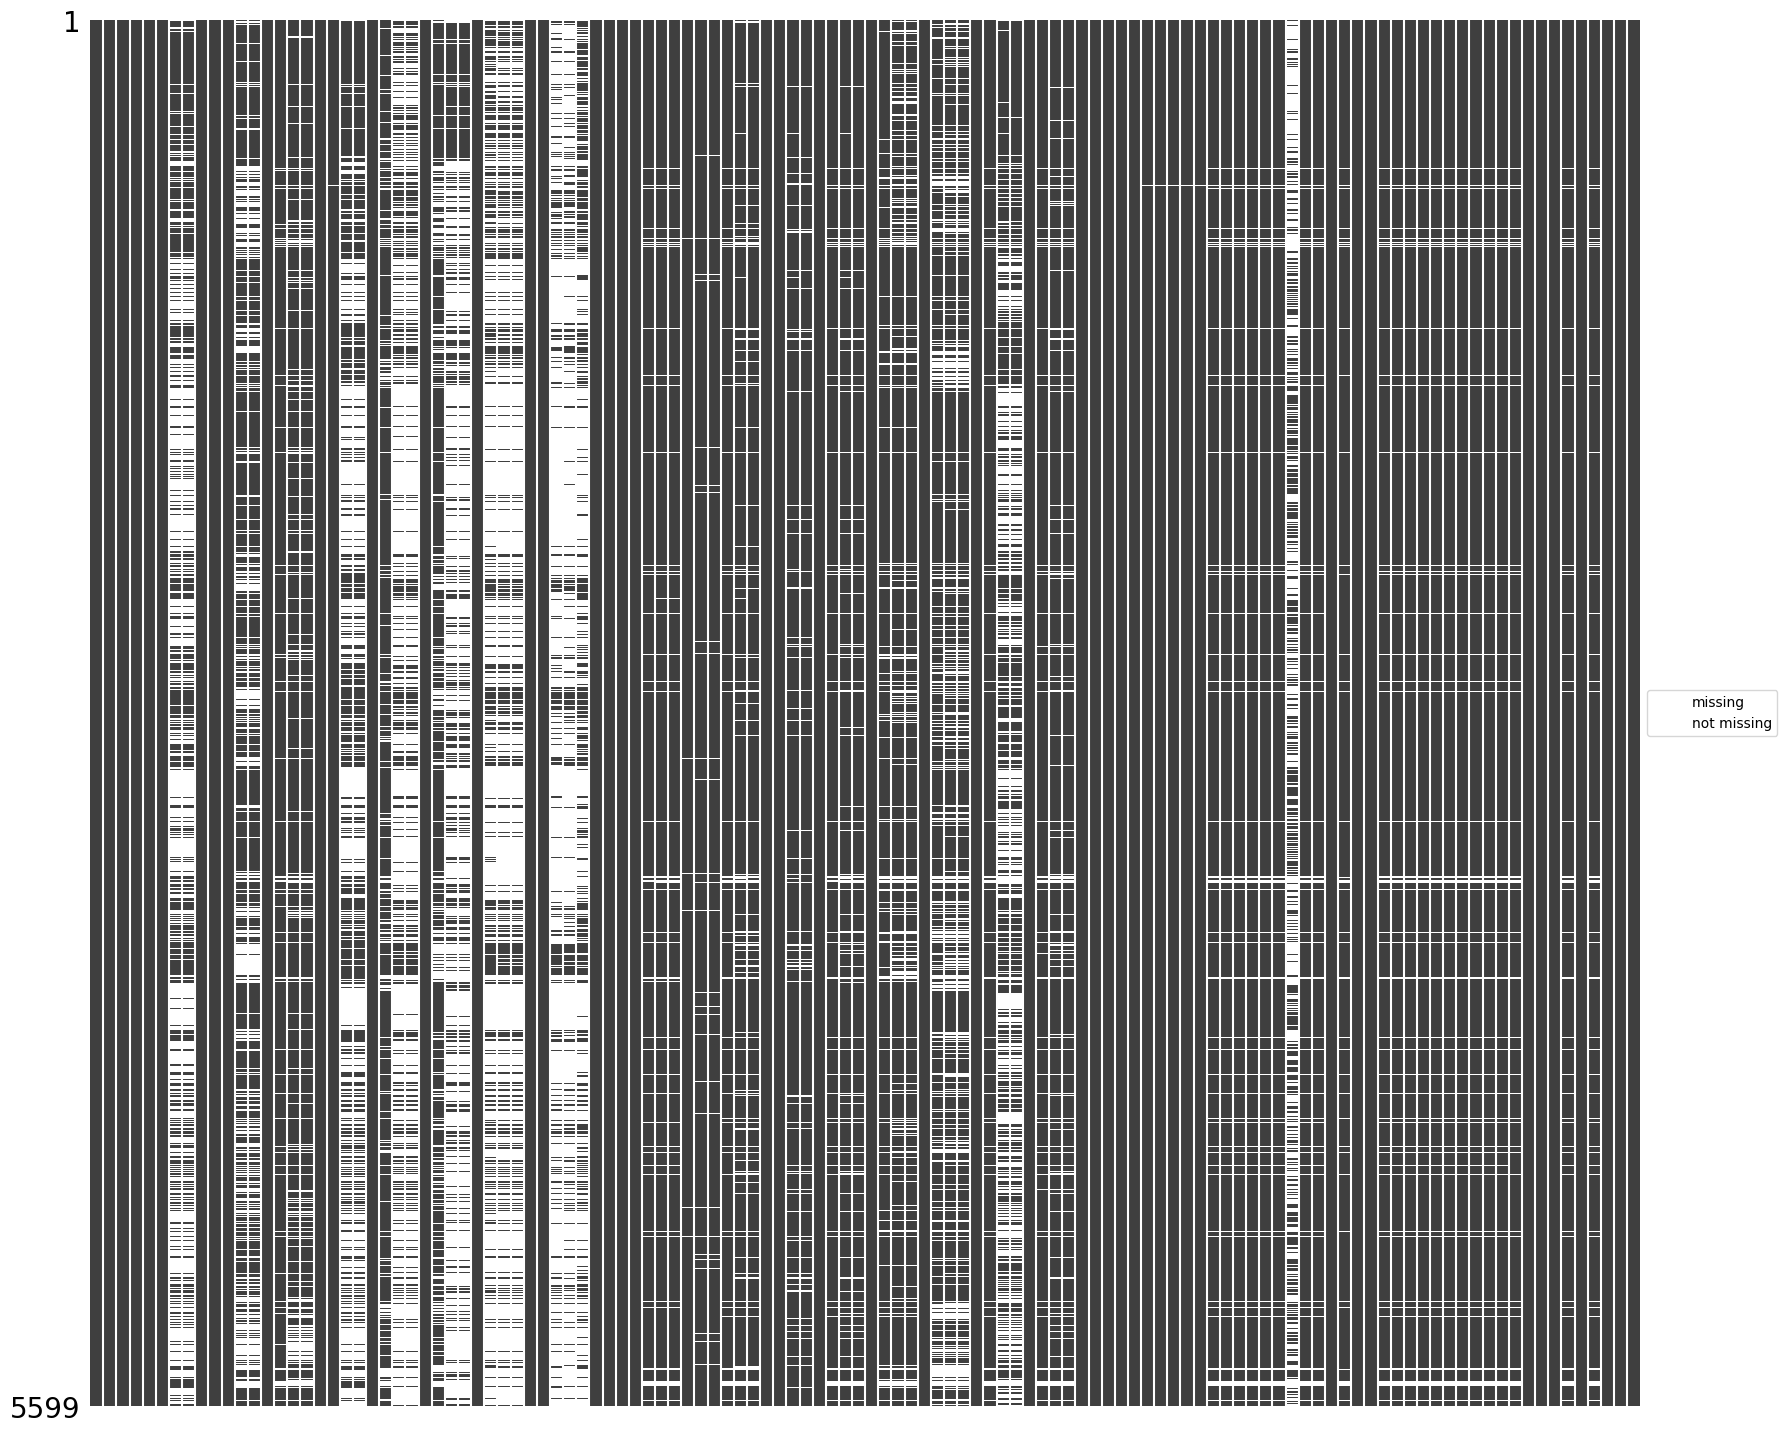

In [8]:
import missingno as msno

msno.matrix(df_phl, figsize=(20, 18), sparkline=False)
plt.legend(['missing','not missing'],loc='center left', bbox_to_anchor=(1, 0.5))

In [180]:
# missing ratios
missing_percentage = (missing_values / len(df_phl)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
S_NAME_HD                      82.657617
S_NAME_HIP                     81.782461
P_OMEGA_ERROR_MAX              72.762993
P_OMEGA_ERROR_MIN              72.762993
P_ECCENTRICITY_ERROR_MIN       71.155563
P_ECCENTRICITY_ERROR_MAX       71.155563
P_OMEGA                        70.369709
P_INCLINATION_ERROR_MAX        69.315949
P_INCLINATION_ERROR_MIN        69.280229
S_TYPE                         63.904269
P_TEMP_SURF                    56.402929
P_MASS_ERROR_MIN               55.242008
P_MASS_ERROR_MAX               55.242008
P_SEMI_MAJOR_AXIS_ERROR_MIN    51.830684
P_SEMI_MAJOR_AXIS_ERROR_MAX    51.830684
S_LOG_LUM_ERROR_MIN            42.846937
S_LOG_LUM_ERROR_MAX            42.543311
P_RADIUS_ERROR_MIN             31.291302
P_RADIUS_ERROR_MAX             31.291302
S_AGE_ERROR_MAX                26.040364
S_AGE_ERROR_MIN                26.040364
P_INCLINATION                  23.414896
S_AGE                          21.557421
P_ECCENTRIC

In [9]:
df_phl.columns.to_list()

['P_NAME',
 'P_DETECTION',
 'P_DISCOVERY_FACILITY',
 'P_YEAR',
 'P_UPDATE',
 'P_MASS',
 'P_MASS_ERROR_MIN',
 'P_MASS_ERROR_MAX',
 'P_MASS_LIMIT',
 'P_MASS_ORIGIN',
 'P_RADIUS',
 'P_RADIUS_ERROR_MIN',
 'P_RADIUS_ERROR_MAX',
 'P_RADIUS_LIMIT',
 'P_PERIOD',
 'P_PERIOD_ERROR_MIN',
 'P_PERIOD_ERROR_MAX',
 'P_PERIOD_LIMIT',
 'P_SEMI_MAJOR_AXIS',
 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
 'P_SEMI_MAJOR_AXIS_LIMIT',
 'P_ECCENTRICITY',
 'P_ECCENTRICITY_ERROR_MIN',
 'P_ECCENTRICITY_ERROR_MAX',
 'P_ECCENTRICITY_LIMIT',
 'P_INCLINATION',
 'P_INCLINATION_ERROR_MIN',
 'P_INCLINATION_ERROR_MAX',
 'P_INCLINATION_LIMIT',
 'P_OMEGA',
 'P_OMEGA_ERROR_MIN',
 'P_OMEGA_ERROR_MAX',
 'P_OMEGA_LIMIT',
 'S_NAME',
 'S_NAME_HD',
 'S_NAME_HIP',
 'S_TYPE',
 'S_RA',
 'S_DEC',
 'S_RA_STR',
 'S_DEC_STR',
 'S_MAG',
 'S_MAG_ERROR_MIN',
 'S_MAG_ERROR_MAX',
 'S_DISTANCE',
 'S_DISTANCE_ERROR_MIN',
 'S_DISTANCE_ERROR_MAX',
 'S_TEMPERATURE',
 'S_TEMPERATURE_ERROR_MIN',
 'S_TEMPERATURE_ERROR_MAX',
 'S_TE

In [10]:
# drop redundant columns and columns with error terms and high missing values
cols_to_drop = ['S_NAME_HD', 'S_NAME_HIP', 'P_UPDATE', 'P_MASS_ERROR_MIN',
    'P_MASS_ERROR_MAX', 'P_MASS_LIMIT', 'P_RADIUS_ERROR_MIN',
    'P_RADIUS_ERROR_MAX', 'P_RADIUS_LIMIT', 'P_PERIOD_ERROR_MIN',
    'P_PERIOD_ERROR_MAX', 'P_PERIOD_LIMIT', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
    'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_LIMIT', 
    'P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 
    'P_ECCENTRICITY_LIMIT', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX',
    'P_INCLINATION_LIMIT', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 
    'P_OMEGA_LIMIT', 'S_NAME_HD', 'S_NAME_HIP', 'S_RA', 'S_DEC', 'S_RA_STR', 'S_DEC_STR',
    'S_MAG_ERROR_MIN', 'S_MAG_ERROR_MAX', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX',
    'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_TEMPERATURE_LIMIT',
    'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_MASS_LIMIT', 'S_RADIUS_ERROR_MIN',
    'S_RADIUS_ERROR_MAX', 'S_RADIUS_LIMIT', 'S_METALLICITY_ERROR_MIN',
    'S_METALLICITY_ERROR_MAX', 'S_METALLICITY_LIMIT', 'S_AGE_ERROR_MIN',
    'S_AGE_ERROR_MAX', 'S_AGE_LIMIT', 'S_LOG_LUM_ERROR_MIN', 'S_LOG_LUM_ERROR_MAX',
    'S_LOG_LUM_LIMIT', 'S_LOG_G_ERROR_MIN', 'S_LOG_G_ERROR_MAX',
    'S_LOG_G_LIMIT', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 
    'P_TEMP_EQUIL_MAX', 'P_TEMP_SURF_MIN', 'P_TEMP_SURF_MAX', 'S_RA_TXT',
    'S_DEC_TXT', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN',
    'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX',
    'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG']

df_phl.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
df_phl.shape

(5599, 46)

For simplisity lets consider all planets with 'P_HABITABLE' > 0 to be categorized as habitable planet.

In [12]:
df_phl['HABITABILITY'] = (df_phl["P_HABITABLE"]>0).astype(int)
df_phl["HABITABILITY"].value_counts()

HABITABILITY
0    5529
1      70
Name: count, dtype: int64

In [13]:
#save data
df_phl.to_csv('../data/processed/categorized_data.csv', index=False)

Let's take a look at the confirmed exoplanets from TESS project. These exoplanets are not labled. This could be a potential dataset for evaluating the final model.

In [105]:
filename = '../data/raw/tess_confirmed_2025.12.12_06.39.40.csv'

with open(filename, errors='replace') as f:
    for i, line in enumerate(f, 1):
        if 40 <= i <= 60:
            print(i, repr(line[:400]))


40 '# COLUMN decstr:         Dec [sexagesimal]\n'
41 '# COLUMN dec:            Dec [deg]\n'
42 '# COLUMN sy_dist:        Distance [pc]\n'
43 '# COLUMN sy_vmag:        V (Johnson) Magnitude\n'
44 '# COLUMN sy_kmag:        Ks (2MASS) Magnitude\n'
45 '# COLUMN sy_gaiamag:     Gaia Magnitude\n'
46 '# COLUMN rowupdate:      Date of Last Update\n'
47 '# COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date\n'
48 '# COLUMN releasedate:    Release Date\n'
49 '#\n'
50 'pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_insol,pl_eqt,ttv_flag,st_refname,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate\n'
51 'AU Mic b,AU Mic,1,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=

In [106]:
df_tess = pd.read_csv(filename, header=49)
df_tess.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
0,AU Mic b,AU Mic,1,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,311.291137,-31d20m32.82s,-31.342450,9.7221,8.810,4.529,7.84038,2024-09-28,2023-12,2024-09-28
1,AU Mic c,AU Mic,1,1,4,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,311.291137,-31d20m32.82s,-31.342450,9.7221,8.810,4.529,7.84038,2024-09-28,2023-12,2024-09-28
2,BD+05 4868 A b,BD+05 4868 A,1,2,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,326.861404,+06d36m19.15s,6.605319,43.5687,10.158,7.448,9.84152,2025-03-21,2025-01,2025-03-21
3,BD-14 3065 b,BD-14 3065 A,1,3,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,153.669669,-15d38m34.21s,-15.642837,589.4230,11.100,9.932,10.91000,2024-06-25,2024-03,2024-06-25
4,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,354.915467,-69d11m45.75s,-69.196043,44.0622,8.170,6.676,8.31926,2019-07-03,2019-07,2019-07-11


In [107]:
df_tess.shape

(718, 42)

In [108]:
df_tess.columns.to_list()

['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbsmax',
 'pl_rade',
 'pl_radj',
 'pl_bmasse',
 'pl_bmassj',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_insol',
 'pl_eqt',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'st_metratio',
 'st_logg',
 'sy_refname',
 'rastr',
 'ra',
 'decstr',
 'dec',
 'sy_dist',
 'sy_vmag',
 'sy_kmag',
 'sy_gaiamag',
 'rowupdate',
 'pl_pubdate',
 'releasedate']

In [109]:
# redundant columns to drop
col_drop = ['default_flag', 'sy_snum', 'sy_pnum', 'pl_controv_flag',
            'pl_refname', 'pl_radj', 'pl_bmassj', 'ttv_flag', 'st_refname',
            'sy_refname', 'rastr', 'ra', 'decstr', 'dec', 'sy_vmag', 'sy_kmag',
            'sy_gaiamag', 'rowupdate', 'pl_pubdate', 'releasedate']

In [110]:
df_tess.drop(col_drop, axis=1, inplace=True)

In [111]:
df_tess.shape

(718, 22)

In [112]:
common_pl = df_phl[df_phl['P_NAME'].isin(df_tess['pl_name'])]
common_pl.shape

(427, 42)

In [121]:
df_main = pd.merge(df_phl, df_tess, left_on='P_NAME', right_on='pl_name', how='outer')
df_main.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_MASS,P_MASS_ORIGIN,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,...,pl_insol,pl_eqt,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist
0,11 Com b,Radial Velocity,Xinglong Station,2007.0,4914.8985,Msini,12.2,323.21000,1.178,0.238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,2009.0,4684.8142,Msini,12.3,516.21997,1.530,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14 And b,Radial Velocity,Okayama Astrophysical Observatory,2008.0,1131.1513,Msini,13.1,186.76000,0.775,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14 Her b,Radial Velocity,W. M. Keck Observatory,2002.0,2559.4722,Mass,12.6,1765.03890,2.774,0.373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16 Cyg B b,Radial Velocity,Multiple Observatories,1996.0,565.7374,Msini,13.5,798.50000,1.660,0.680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df_main.shape

(5890, 64)

In [123]:
df_main['HABITABILITY'].isna().sum()

np.int64(291)

there are 219 exoplanets that are not labled from the 'tess' dataset. we can use them as a test set to evaluate the final model.

In [125]:
df_main.columns.to_list()

['P_NAME',
 'P_DETECTION',
 'P_DISCOVERY_FACILITY',
 'P_YEAR',
 'P_MASS',
 'P_MASS_ORIGIN',
 'P_RADIUS',
 'P_PERIOD',
 'P_SEMI_MAJOR_AXIS',
 'P_ECCENTRICITY',
 'P_INCLINATION',
 'P_OMEGA',
 'S_NAME',
 'S_TYPE',
 'S_MAG',
 'S_DISTANCE',
 'S_TEMPERATURE',
 'S_MASS',
 'S_RADIUS',
 'S_METALLICITY',
 'S_AGE',
 'S_LOG_LUM',
 'S_LOG_G',
 'P_ESCAPE',
 'P_POTENTIAL',
 'P_GRAVITY',
 'P_DENSITY',
 'P_HILL_SPHERE',
 'P_DISTANCE',
 'P_PERIASTRON',
 'P_APASTRON',
 'P_DISTANCE_EFF',
 'P_FLUX',
 'P_TEMP_EQUIL',
 'P_TEMP_SURF',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_LUMINOSITY',
 'P_TYPE_TEMP',
 'P_HABITABLE',
 'P_ESI',
 'HABITABILITY',
 'pl_name',
 'hostname',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_orbper',
 'pl_orbsmax',
 'pl_rade',
 'pl_bmasse',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_insol',
 'pl_eqt',
 'st_spectype',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'st_metratio',
 'st_logg',
 'sy_dist']

drop redundant columns:

In [154]:
df_main.duplicated(subset=['S_METALLICITY', 'st_met']).any()

np.True_

In [155]:
columns_to_drop = [
 'pl_name', 'hostname', 'discoverymethod', 'disc_year',
 'disc_facility', 'pl_orbsmax', 'st_logg', 'st_met',
 'st_mass', 'st_rad', 'pl_eqt', 'pl_orbeccen', 'pl_rade',
 'pl_bmasse', 'pl_orbper'
 ]
df_main.drop(columns=columns_to_drop, axis=1, inplace=True)

In [156]:
df_main.shape

(5890, 49)